In [1]:
import pandas as pd
import numpy as np
import os

In [73]:
FLD = "/home/nur/projects/analysis/dynamic_price/data/competitor_based"
!ls {FLD}

1510001_agr.csv  1510003_agr.csv  conc_df.csv	     sku_dict.csv
1510002_agr.csv  ZX10208_agr.csv  promo_1510002.csv


Считаем файл `sku_dict.csv` и посмотрим на его первые 5 записей

In [74]:
sku_dict = pd.read_csv(os.path.join(FLD, 'sku_dict.csv'))
sku_dict.head(2)

,sku_id,fincode,ui1_code,ui2_code,ui3_code,vendor,brand_code,creation_date,expiration_date
0,43207,A1,A10,A1000,A1000001,A10001,A1000001,2018-01-01,2200-01-01 00:00:00
1,87209,UA,UA1,UA100,UA10000,BLW9FG,484JDFU5,2019-09-05,2200-01-01 00:00:00


 Заметим, что колонки `fincode`, `ui1_code`, `ui2_code` и `ui3_code` имеют схожие черты: следующая дополняет предыдущую. Аналогичная ситуация и с колонками `vendor` и `brand_code`

# EDA

Посмотрим, с какими данными мы имеем дело, какой их тип, сколько пропусков в данных

In [5]:
sku_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sku_id           10000 non-null  int64 
 1   fincode          10000 non-null  object
 2   ui1_code         10000 non-null  object
 3   ui2_code         10000 non-null  object
 4   ui3_code         10000 non-null  object
 5   vendor           10000 non-null  object
 6   brand_code       10000 non-null  object
 7   creation_date    10000 non-null  object
 8   expiration_date  10000 non-null  object
dtypes: int64(1), object(8)
memory usage: 703.2+ KB


Видно,что у нас в датасете 10000 записей и что в данных нет пропусков

Посчитаем сколько в каждой из колоно уникальных записей:

In [6]:
for col in sku_dict.columns:
    print(col,sku_dict['{}'.format(col)].nunique())

sku_id 10000
fincode 31
ui1_code 46
ui2_code 109
ui3_code 804
vendor 25
brand_code 63
creation_date 669
expiration_date 582


Видно, что в колонках `fincode`, `ui1_code`, `ui2_code` не так уж и много уникальных значений. Давайте на них посмотрим

In [7]:
sku_dict.fincode.unique()

array(['A1', 'UA', 'G9', 'AQ', '6L', '4W', 'ZR', '15', 'SI', 'BY', '70',
       'BJ', 'RI', 'MB', 'YT', 'K9', 'FE', 'Z8', 'GY', 'M2', 'XG', 'LT',
       'EH', 'ZX', 'H7', '8J', 'AG', 'B1', 'Q5', 'GV', 'B0'], dtype=object)

In [8]:
sku_dict.ui1_code.unique()

array(['A10', 'UA1', 'G91', 'AQ1', '6L1', '4W1', 'ZR1', '151', 'SI1',
       'BY1', '701', 'BJ1', 'RI1', 'MB1', 'YT1', 'K91', 'FE1', 'Z81',
       'GY1', 'M21', 'XG1', 'LT1', 'EH1', 'ZX1', 'H71', '8J1', 'AG1',
       'B11', 'Q51', 'GV1', 'B01', 'EH0', '700', 'M20', 'K90', 'GV0',
       'ZX0', 'B00', 'G90', 'SI0', 'BJ0', 'RI0', 'UA0', 'YT0', 'Z80',
       '4W0'], dtype=object)

In [9]:
sku_dict.ui2_code.unique()

array(['A1000', 'UA100', 'G9100', 'AQ100', '6L100', '4W100', 'ZR101',
       '15100', 'SI100', 'BY100', '70102', 'BJ100', 'G9101', 'RI100',
       'MB100', 'YT102', 'MB101', 'K9102', 'FE100', 'Z8100', 'GY100',
       'UA102', 'M2100', 'XG100', 'LT102', '70101', 'EH100', 'BY101',
       'LT100', 'ZX101', 'H7100', 'XG102', '4W102', 'ZR100', '8J100',
       'AG100', 'AG101', 'K9100', 'Z8101', 'MB102', 'B1100', '6L102',
       'Q5100', 'GV102', 'B0100', 'AQ101', 'GV100', '70100', 'ZR102',
       'UA101', 'GV101', 'M2102', 'LT101', 'GY101', 'YT100', 'AG102',
       'H7101', '6L101', 'SI101', 'B1102', '8J102', 'RI101', 'B1101',
       'BJ102', 'RI102', 'AQ102', 'GY102', 'EH102', 'Q5102', 'EH101',
       '4W101', 'BJ101', 'BY102', 'FE101', 'G9102', 'M2101', '15101',
       'B0102', 'XG101', 'ZX100', 'SI102', 'B0101', '15102', '8J101',
       'K9101', 'Q5101', 'EH000', 'YT101', 'H7102', 'ZX102', 'FE102',
       'Z8102', '70000', 'M2000', 'K9000', 'EH002', 'GV000', 'ZX001',
       'B0000', 'G90

In [11]:
sku_dict.ui3_code.unique()[:20]

array(['A1000001', 'UA10000', 'G910003', 'AQ10000', '6L10005', '4W10000',
       'ZR10100', 'AQ10008', '1510004', 'SI10006', 'AQ10005', 'BY10001',
       '7010200', 'AQ10001', 'BJ10001', 'G910100', 'RI10007', 'MB10006',
       'YT10204', 'MB10101'], dtype=object)

Аналогичная ситуация с `brand_code` и `vendor`. Тут посмотрим сколько раз присутствует каждое значение в датасете

In [10]:
sku_dict.brand_code.value_counts()

4WL34OA2    459
8FYENEWM    439
THSTSG81    384
02Q78ADY    304
MMC2P4Y3    294
           ... 
SKXXW8V9     59
JK4UKBI2     52
74CKJ9XQ     51
H1BWFJRN     33
A1000001      1
Name: brand_code, Length: 63, dtype: int64

In [11]:
sku_dict.vendor.value_counts()

UEYMBB    458
TJYT3A    447
71SM2O    445
7I77VL    440
LDLJFP    435
T9BUA7    434
2CI2A8    432
UH2WWF    430
AWD3XQ    425
SJP384    425
4HJSP5    419
BLW9FG    418
3GFIMK    411
B4TA32    411
SHL570    408
AO59EQ    403
VWHZMG    400
H2OK0Z    399
VZ44WY    399
JSOSD5    398
FI3ASO    398
GVL335    391
4O4WSH    390
CHQKSO    383
A10001      1
Name: vendor, dtype: int64

Следующим шагом посчитаем, количество записей с различными комбинациями `(fincode, ui1_code)` и `(ui1_code, ui3_code)`, отсортировав их по первому признаку из каждой пары

In [12]:
sku_dict.groupby(['fincode', 'ui1_code']).sku_id.agg('count').reset_index().sort_values('fincode')

,fincode,ui1_code,sku_id
0,15,151,326
1,4W,4W0,1
2,4W,4W1,345
3,6L,6L1,305
4,70,700,1
5,70,701,305
6,8J,8J1,322
7,A1,A10,1
8,AG,AG1,309
9,AQ,AQ1,347


In [13]:
sku_dict.groupby(['ui1_code', 'ui3_code']).sku_id.agg('count').reset_index().sort_values('ui1_code')

,ui1_code,ui3_code,sku_id
0,151,1510000,123
23,151,1510208,4
22,151,1510207,2
21,151,1510206,2
20,151,1510205,1
...,...,...,...
778,ZX1,ZX10001,11
777,ZX1,ZX10000,112
802,ZX1,ZX10207,1
789,ZX1,ZX10103,1


## ZX10208 Group

Теперь загрузим файл `ZX10209_agr.csv` и посмотрим на его начало (первые 5 записей)

In [14]:
ZX10208_df = pd.read_csv(os.path.join(FLD, 'ZX10208_agr.csv'))

In [15]:
ZX10208_df.head()

,dates,SKU,price_per_sku,num_purchases
0,2018-04-20,59567,169.19,3
1,2018-04-24,59567,171.71,3
2,2018-04-27,59567,174.04,3
3,2018-04-30,59567,NaN,1
4,2018-05-03,59567,176.38,2


Видно, что в столбце `SKU` повторяющиеся значения. Посмотрим сколько всего уникальных значений там присутствует

In [16]:
ZX10208_df.SKU.unique()

array([59567, 82947])

Видно, что их всего 2. Теперь посмотрим, есть ли в первом файле записи с такими же значениями

In [17]:
sku_dict[sku_dict.sku_id.isin(ZX10208_df.SKU.unique())]

,sku_id,fincode,ui1_code,ui2_code,ui3_code,vendor,brand_code,creation_date,expiration_date
1484,59567,ZX,ZX1,ZX102,ZX10208,SJP384,3FAIRJ4W,2018-04-16,2019-04-21 00:00:00
4048,82947,ZX,ZX1,ZX102,ZX10208,TJYT3A,3FAIRJ4W,2018-09-26,2200-01-01 00:00:00


Переформатируем данные в колонке `dates` в формат `Datetime`

In [18]:
ZX10208_df.dates = pd.to_datetime(ZX10208_df.dates)

Посмотрим, какие значения принимает времянная переменная в записях, где `SKU` принимает значение 82947

In [19]:
ZX10208_df[ZX10208_df.SKU == 82947].dates.describe()

/home/nur/projects/analysis/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                     103
unique                    103
top       2019-09-09 00:00:00
freq                        1
first     2018-09-28 00:00:00
last      2019-12-28 00:00:00
Name: dates, dtype: object

In [20]:
#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

Визуализируем зависимость стоимость каждого(-ой) `SKU` от времени с помощью функции `plt.scatter()`

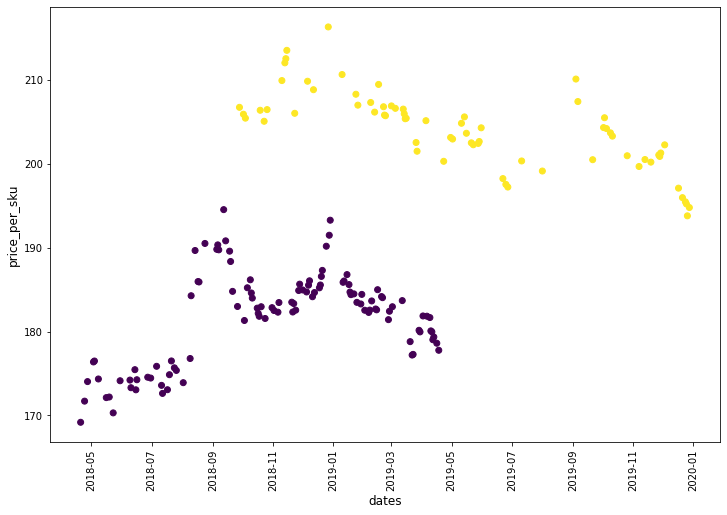

In [21]:
plt.figure(figsize=(12, 8))
plt.scatter(x='dates', y='price_per_sku', data=ZX10208_df, c='SKU')
plt.ylabel('price_per_sku', fontsize=12)
plt.xlabel('dates', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

Добавим в датасет новые временные features, такие как год (`year`), месяц (`month`), номер недели (`week_num`) и комбинацию год-неделя (`year_week`) и снова посмотрим на результат

In [22]:
# week month and year
ZX10208_df['week_num'] = ZX10208_df.dates.dt.week
ZX10208_df['year'] = ZX10208_df.dates.dt.year
ZX10208_df['months'] = ZX10208_df.dates.dt.month
ZX10208_df['year_week'] =  ZX10208_df['year'].astype(str) + '_' + ZX10208_df['week_num'].astype(str)

/home/nur/projects/analysis/env/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [23]:
ZX10208_df.head()

,dates,SKU,price_per_sku,num_purchases,week_num,year,months,year_week
0,2018-04-20,59567,169.19,3,16,2018,4,2018_16
1,2018-04-24,59567,171.71,3,17,2018,4,2018_17
2,2018-04-27,59567,174.04,3,17,2018,4,2018_17
3,2018-04-30,59567,NaN,1,18,2018,4,2018_18
4,2018-05-03,59567,176.38,2,18,2018,5,2018_18


Теперь давайте посчитаем среднее значение стоимости `SKU` в неделю. Обратим внимание, что группировка идет по переменной `year_week`, а не `week_num`, потому что мы хотим отличать недели в разных годах. Также переименуем для удобства полученную переменную как `mean_per_week` и присоединим к оригинальному датасету. В анализе данных подсчет средних и медианных значений нередко помогает уменьшить влияние выбросов (outlier'ов) и увидеть присутствующие тренды

In [23]:
ZX10208_gr = ZX10208_df.groupby(['year_week','SKU']).price_per_sku.mean().reset_index()

In [24]:
ZX10208_gr = ZX10208_gr.rename(columns={'price_per_sku': 'mean_per_week'})

In [25]:
ZX10208_df = ZX10208_df.merge(ZX10208_gr, how='left', on=['year_week','SKU'])

In [27]:
ZX10208_df.head(2)

,dates,SKU,price_per_sku,num_purchases,week_num,year,months,year_week,mean_per_week
0,2018-04-20,59567,169.19,3,16,2018,4,2018_16,169.190
1,2018-04-24,59567,171.71,3,17,2018,4,2018_17,172.875


Визуализируем среднюю стоимость `SKU` за неделю от собственно номера недели для значения `SKU = 59567`

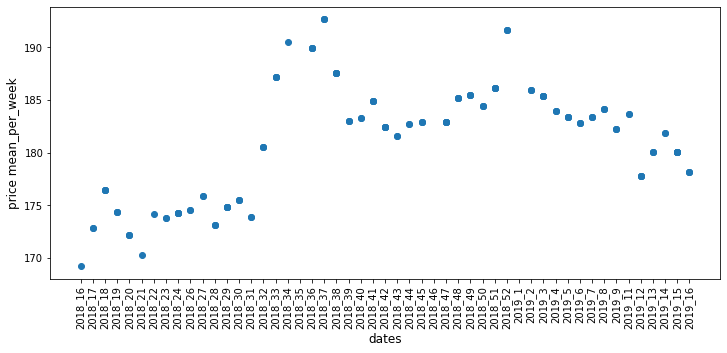

In [34]:
plt.figure(figsize=(12, 5))
plt.scatter(x='year_week', y='mean_per_week', 
            data=ZX10208_df[ZX10208_df.SKU == 59567].sort_values('dates'))
plt.ylabel('price mean_per_week', fontsize=12)
plt.xlabel('dates', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

Теперь хотелось бы построить график среднего значения `SKU` в зависимости от даты для всех (в нашем случае 2х) значений `SKU`. Для этого будет удобно несколько переоформатировать наш `DataFrame` с помощью метода `pivot_table()`. Он построит таблицу зависимости всех значений параметра `values` от значений параметра `index` для каждого из уникальных значений параметра из `columns` . Получится следующее:

In [30]:
pivot_t = ZX10208_df.pivot_table(index='dates', columns='SKU', values='price_per_sku')

In [31]:
pivot_t.head(2)

SKU,59567,82947
dates,,
2018-04-20,169.19,NaN
2018-04-24,171.71,NaN


И теперь ее легко построить

<AxesSubplot:xlabel='dates'>

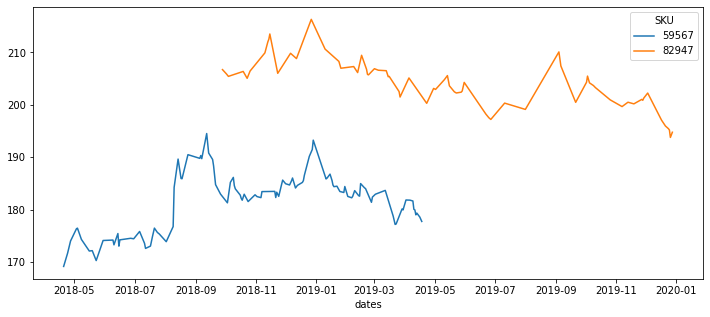

In [33]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=pivot_t, dashes=False)

Мы видим, что цены сильно меняются по дням, причем в районе августа 2018 года цена `SKU=59567` сильно выросла, а потом снвоа упала. Через некоторое время произощел еще один скачек в районе января 2019 года. С ценой другого `SKU` происходтя похожие осцилляции, но с видимым нисходящим трендом

# 1510001 group

Считаем данные по этой группе и, как обычно, посмотрим на структуру файла

In [35]:
df_1510001 = pd.read_csv(os.path.join(FLD, '1510001_agr.csv'))

In [36]:
df_1510001.head(2)

,dates,SKU,price_per_sku,num_purchases
0,2018-08-02,39665,85.94,1
1,2018-08-03,39665,85.94,1


Видим знакомую уже нам структуру. `SKU`, даты, цену и количество покупок. Видим, что цена не сильно меняется со временем. Снова, как и в предыдщуем примере, построим "широкую" таблицу зависимости цен от времени для каждого `SKU`

In [37]:
df_1510001.dates = pd.to_datetime(df_1510001.dates)

In [38]:
pivot_t = df_1510001.pivot_table(index='dates', columns='SKU', values='price_per_sku')

In [39]:
pivot_t.head(2)

SKU,27240,27885,34130,36108,39665,40194,45164,48671,49596,59631,63995,70252,70315,72449
dates,,,,,,,,,,,,,,
2018-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.784,NaN,NaN
2018-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.784,NaN,NaN


И визуализируем эти динамики цен

<AxesSubplot:xlabel='dates'>

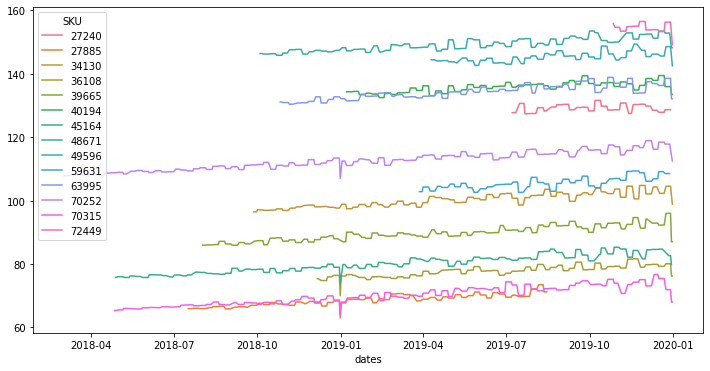

In [41]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot_t, dashes=False)

На графике можно увидеть, что цены на кадый из `SKU` медленно растет

Давайте посмотрим на колчество уникальных значений `SKU` и собственно на сами значения

In [42]:
df_1510001.SKU.nunique()

14

In [43]:
df_1510001.SKU.unique()

array([39665, 63995, 70252, 34130, 70315, 27885, 59631, 48671, 72449,
       49596, 27240, 45164, 40194, 36108])

Также можно посмотреть статистики для какого-нибудь конкретного значения `SKU`, например для `SKU = 39665`

In [44]:
df_1510001[df_1510001.SKU == 39665].num_purchases.describe()

count    354.000000
mean       1.519774
std        0.694702
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: num_purchases, dtype: float64

Теперь давайте визуализируем кривую **эластичности спроса** (зависимость цены $P$ от колчество сбыта $Q$)

<AxesSubplot:xlabel='num_purchases', ylabel='price_per_sku'>

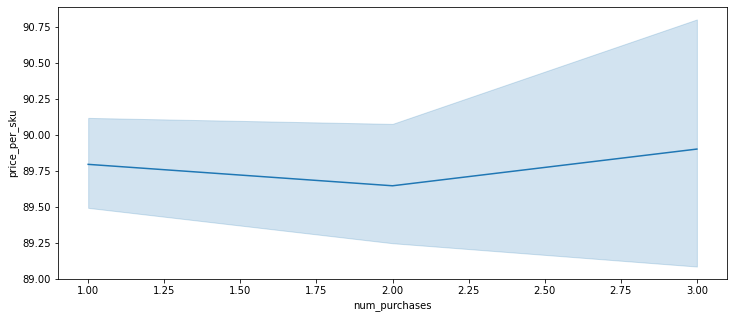

In [45]:
plt.figure(figsize=(12, 5))
sns.lineplot(x=df_1510001[df_1510001.SKU == 39665].num_purchases, 
             y=df_1510001[df_1510001.SKU == 39665].price_per_sku)

Судя по графику, сложно сказать, к какой динамике сбыта `SKU` приведет изменение (понижение) цены (слишком широкий интервал)

# 1510002 group

Рассмотри теперь еще несколько групп. В них соответствующие тренды видны куда сильнее

Снова загрузим файлы

In [46]:
df_1510002 = pd.read_csv(os.path.join(FLD, '1510002_agr.csv'))

In [47]:
df_1510002.dates = pd.to_datetime(df_1510002.dates)

Совершенно аналогично сгенерируем "широкую" таблицу с помощью `pivot_table()`

In [48]:
pivot_t = df_1510002.pivot_table(index='dates', columns='SKU', values='price_per_sku')

In [49]:
pivot_t.head(2)

SKU,10334,17812,36096,38767,43678,57561,64619,68211,69997,72784,83329,90611,98255
dates,,,,,,,,,,,,,
2018-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.294,NaN,NaN,NaN
2018-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.294,NaN,NaN,NaN


И визуализируем (как и раньше)

<AxesSubplot:xlabel='dates'>

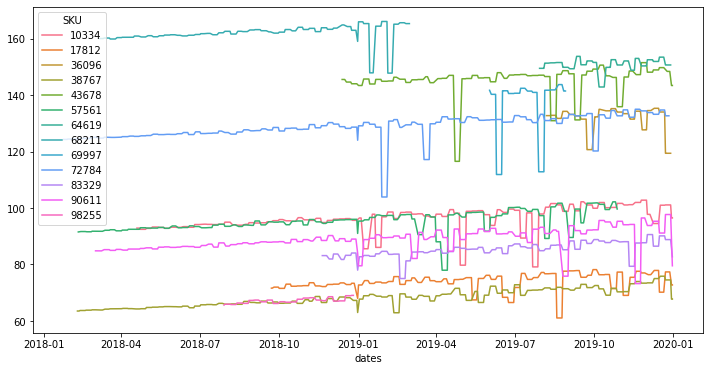

In [50]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot_t, dashes=False)

Пока по графику не очень понятно, что происходит (очень сильные осцилляции)

Загрузим `DataFrame` с информацией по промоакциям (`discount` - скидка на товар). Необходимо помнить, что в данном случае цена на `SKU` уже с учетом скидки

In [51]:
promo_df = pd.read_csv(os.path.join(FLD, 'promo_1510002.csv'))

In [52]:
promo_df.discount = 1 - promo_df.discount

Как обычно уже дополним наши данные годом (`year`) и номером недели (`num_week`) и посмотрим что будет происходить количеством покупок, начиная с 1 января 2019 для `SKU` 72784

In [53]:
df_1510002['year'] = df_1510002.dates.dt.year
df_1510002['week_num'] = df_1510002.dates.dt.week
df_1510002 = df_1510002[df_1510002.dates >= pd.to_datetime('2019-01-01')]

/home/nur/projects/analysis/env/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [54]:
df_72784 = df_1510002[df_1510002.SKU == 72784]

Посмотрим на максимальное значение продаж на каждой неделе

In [55]:
df_72784.groupby(['year', 'week_num']).num_purchases.max().reset_index()

,year,week_num,num_purchases
0,2019,1,8
1,2019,2,7
2,2019,3,7
3,2019,4,7
4,2019,5,11
5,2019,6,6
6,2019,7,6
7,2019,8,8
8,2019,9,8
9,2019,10,8


Видим, что в 5 и 12 недели есть всплеск продаж. Можно убедиться, что именно в эти недели были промоакции на этот `SKU`

Совместим данные про промоакции с основными данными и добавим изначальную цену до учета скидок

In [56]:
df_1510002 = df_1510002.merge(promo_df, how='left', on=['SKU', 'year', 'week_num'])

In [57]:
df_1510002['real_price_per_sku'] = df_1510002.price_per_sku / (1 - df_1510002.discount)

In [58]:
df_1510002[~df_1510002.discount.isnull()]

,dates,SKU,price_per_sku,num_purchases,year,week_num,discount,real_price_per_sku
0,2019-01-01,90611,79.5420,7,2019,1,0.1,88.380
13,2019-01-02,90611,79.5420,7,2019,1,0.1,88.380
20,2019-01-03,90611,79.5420,9,2019,1,0.1,88.380
27,2019-01-04,90611,79.5420,6,2019,1,0.1,88.380
35,2019-01-05,90611,79.5420,6,2019,1,0.1,88.380
...,...,...,...,...,...,...,...,...
2285,2019-12-26,36096,119.3868,14,2019,52,0.1,132.652
2298,2019-12-27,36096,119.3868,13,2019,52,0.1,132.652
2299,2019-12-28,36096,119.3868,13,2019,52,0.1,132.652
2305,2019-12-29,36096,119.3868,14,2019,52,0.1,132.652


# 1510003 group

Теперь посмотрим на финальную группу. Как обычно считаем данные и посмотрим на структуру файлов

Тут в файле `conc_df.csv` содержатся данные про цены у конкурентов

In [59]:
df_1 = pd.read_csv(os.path.join(FLD, '1510003_agr.csv'))

In [61]:
df_1.head(2)

,dates,SKU,price_per_sku,num_purchases
0,2018-11-17,54404,80.095,11
1,2018-11-18,54404,80.095,12


In [62]:
conc_df = pd.read_csv(os.path.join(FLD, 'conc_df.csv'))

In [63]:
conc_df.head(2)

,SKU,year,week_num,ret_net_code,price_per_sku
0,84395,2019,18,1,164.694
1,84395,2019,18,2,164.694


Посмотрим на цены тех товаров, что торгуются и у конкурентов

In [64]:
df_1[df_1.SKU.isin(conc_df.SKU.unique())]

,dates,SKU,price_per_sku,num_purchases
0,2018-11-17,54404,80.095,11
1,2018-11-18,54404,80.095,12
2,2018-11-19,54404,81.796,10
3,2018-11-20,54404,81.796,11
4,2018-11-21,54404,81.796,10
...,...,...,...,...
2846,2019-12-27,49661,165.978,10
2847,2019-12-28,49661,165.978,9
2848,2019-12-29,49661,165.978,10
2849,2019-12-30,49661,159.205,8


Как обычно приведем формат временных данных в удобный и добавим новые features - неделю (`week_num`) и год (`year`)

In [65]:
df_1.dates = pd.to_datetime(df_1.dates)

In [66]:
df_1['year'] = df_1.dates.dt.year
df_1['week_num'] = df_1.dates.dt.week

/home/nur/projects/analysis/env/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


Посмотрим предельные цены на каждый из товаров ***у конкурентов*** на каждой неделе и присоединим полученную информацию к исходным данным

In [67]:
conc_aggr = conc_df.groupby(['SKU', 'year', 'week_num']).price_per_sku.agg(['min', 'max']).reset_index()

In [68]:
df_1 = df_1.merge(conc_aggr, how='left', on=['SKU', 'year', 'week_num'])

Внимательней изучим полученный результат для конкретного `SKU` (например, для 80308)

In [69]:
df_80308 = df_1[df_1.SKU == 80308]

In [70]:
df_80308.head(4)

,dates,SKU,price_per_sku,num_purchases,year,week_num,min,max
853,2018-07-17,80308,113.94,8,2018,29,NaN,NaN
854,2018-07-18,80308,113.94,8,2018,29,NaN,NaN
855,2018-07-20,80308,113.94,8,2018,29,NaN,NaN
856,2018-07-21,80308,113.94,7,2018,29,NaN,NaN


Построим график количества покупок в зависимости от цен у конкурентов

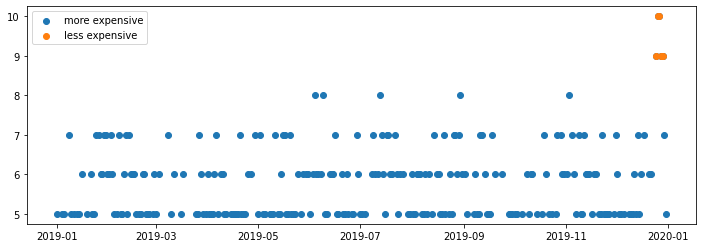

In [72]:
plt.figure(figsize=(12, 4))
plt.scatter(x=df_80308[df_80308.price_per_sku >= df_80308['min']].dates, 
            y=df_80308[df_80308.price_per_sku >= df_80308['min']].num_purchases, 
            label='more expensive')
plt.scatter(x=df_80308[df_80308.price_per_sku <= df_80308['min']].dates, 
            y=df_80308[df_80308.price_per_sku <= df_80308['min']].num_purchases,
            label='less expensive')
plt.legend()

Из графика видно, что когда цена на товар выше, чем у конкурентов, то продажи держатся на уровен 5-8 товаров в день/неделю, а когда же цена на товар выгодней, чем у конкурентов, то прожади взлетают до 9+ товаров за период